## Top Modeling with LDA

**Author : Lasya Nayani Bhatta**

In [1]:
!pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

#### Read news data

In [5]:
news_path = 'https://storage.googleapis.com/msca-bdp-data-open/news/nlp_a_6_news.json'
news_df = pd.read_json(news_path, orient='records', lines=True)

print(f'Sample contains {news_df.shape[0]:,.0f} news articles')
news_df.head(2)

Sample contains 9,962 news articles


,url,date,language,title,text
0,http://oaklandnewsnow.com/breaking-bts-announces-las-vegas-us-concert-date-in-2022/,2022-02-24,en,"BREAKING: BTS Announces LAS VEGAS, US Concert Date in 2022! | Oakland News Now - Oakland News, SF Bay Area, East Bay, California, World","BREAKING: BTS Announces LAS VEGAS, US Concert Date in 2022! | Oakland News Now - Oakland News, SF Bay Area, East Bay, California, WorldSorry, you have Javascript Disabled! To see this page as it is meant to appear, please enable your Javascript!BREAKING: BTS Announces LAS VEGAS, US Concert Date in 2022! | Oakland News Now - Oakland News, SF Bay Area, East Bay, California, WorldSkip to contentMenuSearch for:SearchOakland News Now – Oakland News, SF Bay Area, East Bay, California, WorldOakland..."
1,http://www.newsdzezimbabwe.co.uk/2022/04/mai-tt-weds.html,2022-04-09,en,MAI TT WEDS newsdzeZimbabweNewsdzeZimbabwe,"MAI TT WEDS newsdzeZimbabweNewsdzeZimbabweskip to main | skip to sidebarHomeAboutContactAdvertiseNewsdzeZimbabweOur Zimbabwe Our NewsHomeNewsBusinessEntertainmentSaturday, 9 April 2022MAI TT WEDSSaturday, April 09, 2022 NewsdzeZimbabwe 0 Best moments... @Chakariboy @NyamayaroArron @restmutore @Lattynyangu pic.twitter.com/MsrhcFXUJj— H-Metro (@HMetro_) April 9, 2022 Posted in: Share to TwitterShare to FacebookOlder PostHome0comments: Post a CommentFollow NewsdzeZimbabweRecent..."


**Filtering  non-English articles**

In [6]:
# Filter non-English articles
news_eng = news_df[news_df['language']=='english'].reset_index(drop=True)

**Clean News Title**

In [8]:
import re

def cleanTitle(title):
    # Remove mentions if they exist
    title = re.sub('@[A-Za-z0-9_]+', '', title)
    
    # Remove hashtags if they exist
    title = re.sub('#', '', title)
    
    # Remove hyperlinks if they exist
    title = re.sub(r'https?://\S+', '', title)
    
    # Remove pipe characters if they exist
    title = title.replace('|', '')
    
    # Remove any remaining non-alphanumeric characters and extra whitespaces
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    title = re.sub(r'\s+', ' ', title).strip()
    
    return title.strip()

# Apply the updated cleaning function to the 'title' column in news_df
news_df['cleanedTitle'] = news_df['title'].apply(cleanTitle)

In [9]:
news_df[['title', 'cleanedTitle']].head(5)

,title,cleanedTitle
0,"BREAKING: BTS Announces LAS VEGAS, US Concert Date in 2022! | Oakland News Now - Oakland News, SF Bay Area, East Bay, California, World",BREAKING BTS Announces LAS VEGAS US Concert Date in 2022 Oakland News Now Oakland News SF Bay Area East Bay California World
1,MAI TT WEDS newsdzeZimbabweNewsdzeZimbabwe,MAI TT WEDS newsdzeZimbabweNewsdzeZimbabwe
2,Here's An Eye-Popping Visualization Of How COVID-19 Enters A Human Cell - Digg,Heres An EyePopping Visualization Of How COVID19 Enters A Human Cell Digg
3,taliban: Taliban shut down schools for girls just hours after they reopened - The Economic Times,taliban Taliban shut down schools for girls just hours after they reopened The Economic Times
4,Scotland leader launches campaign for new independence vote | Federal News Network,Scotland leader launches campaign for new independence vote Federal News Network


**Clean News Text**

In [10]:
import re

def cleanNews(text):
    # Remove mentions (@username)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    
    # Remove hashtags (#)
    text = re.sub(r'#', '', text)
    
    # Remove hyperlinks
    text = re.sub(r'https?://\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove non-alphanumeric characters and extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    #text = re.sub(r'\s+', ' ', text).strip()
    
    return text
# Apply the updated cleaning function to the 'text' column in news_df
news_df['cleanedText'] = news_df['text'].apply(cleanNews)


In [11]:
news_df[['text', 'cleanedText']].head(5)

,text,cleanedText
0,"BREAKING: BTS Announces LAS VEGAS, US Concert Date in 2022! | Oakland News Now - Oakland News, SF Bay Area, East Bay, California, WorldSorry, you have Javascript Disabled! To see this page as it is meant to appear, please enable your Javascript!BREAKING: BTS Announces LAS VEGAS, US Concert Date in 2022! | Oakland News Now - Oakland News, SF Bay Area, East Bay, California, WorldSkip to contentMenuSearch for:SearchOakland News Now – Oakland News, SF Bay Area, East Bay, California, WorldOakland...",BREAKING BTS Announces LAS VEGAS US Concert Date in Oakland News Now Oakland News SF Bay Area East Bay California WorldSorry you have Javascript Disabled To see this page as it is meant to appear please enable your JavascriptBREAKING BTS Announces LAS VEGAS US Concert Date in Oakland News Now Oakland News SF Bay Area East Bay California WorldSkip to contentMenuSearch forSearchOakland News Now Oakland News SF Bay Area East Bay California WorldOakland News Now Oakland News YouTube Vlog ...
1,"MAI TT WEDS newsdzeZimbabweNewsdzeZimbabweskip to main | skip to sidebarHomeAboutContactAdvertiseNewsdzeZimbabweOur Zimbabwe Our NewsHomeNewsBusinessEntertainmentSaturday, 9 April 2022MAI TT WEDSSaturday, April 09, 2022 NewsdzeZimbabwe 0 Best moments... @Chakariboy @NyamayaroArron @restmutore @Lattynyangu pic.twitter.com/MsrhcFXUJj— H-Metro (@HMetro_) April 9, 2022 Posted in: Share to TwitterShare to FacebookOlder PostHome0comments: Post a CommentFollow NewsdzeZimbabweRecent...",MAI TT WEDS newsdzeZimbabweNewsdzeZimbabweskip to main skip to sidebarHomeAboutContactAdvertiseNewsdzeZimbabweOur Zimbabwe Our NewsHomeNewsBusinessEntertainmentSaturday April MAI TT WEDSSaturday April NewsdzeZimbabwe Best moments pictwittercomMsrhcFXUJj HMetro April Posted in Share to TwitterShare to FacebookOlder PostHomecomments Post a CommentFollow NewsdzeZimbabweRecent CommentsPowered by DisqusFollow NewsdzeZimbabwePopular PostsTYCOON BEDS MOTHER AND DAUGHTER...
2,"Here's An Eye-Popping Visualization Of How COVID-19 Enters A Human Cell - DiggTrendingExploreMerchExploreMerchSign inClose menuGift GuidesVideoGamingPicksSportsLong ReadsTechCultureScienceRelationshipsSign in to your Digg account.Sign in with TwitterSign in with GoogleBy signing in you agree with ourcommunications and usage terms.Not a member yet? Sign up👋 Welcome to DiggThanks for creating an account! Your accounts lets you Digg (upvote) stories, save stories to revisit later, and more.📩 St...",Heres An EyePopping Visualization Of How COVID Enters A Human Cell DiggTrendingExploreMerchExploreMerchSign inClose menuGift GuidesVideoGamingPicksSportsLong ReadsTechCultureScienceRelationshipsSign in to your Digg accountSign in with TwitterSign in with GoogleBy signing in you agree with ourcommunications and usage termsNot a member yet Sign up Welcome to DiggThanks for creating an account Your accounts lets you Digg upvote stories save stories to revisit later and more Stay uptodateEmail ...
3,"taliban: Taliban shut down schools for girls just hours after they reopened - The Economic Times Benchmarks Nifty17,245.65-69.85NSE Gainer-Large Cap Linde India3,508.05175.35FEATURED FUNDS★★★★★Mirae Asset Hybrid Equity Fund Direct-Growth5Y Return14.62 % Invest NowFEATURED FUNDS★★★★★Mirae Asset Equity Savings Fund Direct - Growth3Y Return13.38 % Invest NowMarket WatchNewsEnglish Edition | E-PaperSubscribeSign InET Prime starts @ Rs 49The Great Holi OfferUpgrade...",taliban Taliban shut down schools for girls just hours after they reopened The Economic Times Benchmarks NiftyNSE GainerLarge Cap Linde IndiaFEATURED FUNDSMirae Asset Hybrid Equity Fund DirectGrowthY Return Invest NowFEATURED FUNDSMirae Asset Equity Savings Fund Direct GrowthY Return Invest NowMarket WatchNewsEnglish Edition EPaperSubscribeSign InET Prime starts Rs The Great Holi OfferUpgrade at discountSearchHomeETPrimeMarketsNewsIndustryRISEPoliticsWe...
4,Scotland leader launches campaign for new independence vote | Federal News Network Techno

In [12]:
news_df[['cleanedTitle', 'cleanedText']].head(2)

,cleanedTitle,cleanedText
0,BREAKING BTS Announces LAS VEGAS US Concert Date in 2022 Oakland News Now Oakland News SF Bay Area East Bay California World,BREAKING BTS Announces LAS VEGAS US Concert Date in Oakland News Now Oakland News SF Bay Area East Bay California WorldSorry you have Javascript Disabled To see this page as it is meant to appear please enable your JavascriptBREAKING BTS Announces LAS VEGAS US Concert Date in Oakland News Now Oakland News SF Bay Area East Bay California WorldSkip to contentMenuSearch forSearchOakland News Now Oakland News SF Bay Area East Bay California WorldOakland News Now Oakland News YouTube Vlog ...
1,MAI TT WEDS newsdzeZimbabweNewsdzeZimbabwe,MAI TT WEDS newsdzeZimbabweNewsdzeZimbabweskip to main skip to sidebarHomeAboutContactAdvertiseNewsdzeZimbabweOur Zimbabwe Our NewsHomeNewsBusinessEntertainmentSaturday April MAI TT WEDSSaturday April NewsdzeZimbabwe Best moments pictwittercomMsrhcFXUJj HMetro April Posted in Share to TwitterShare to FacebookOlder PostHomecomments Post a CommentFollow NewsdzeZimbabweRecent CommentsPowered by DisqusFollow NewsdzeZimbabwePopular PostsTYCOON BEDS MOTHER AND DAUGHTER...


In [13]:
# Combine cleaned title and text into a single column
news_df['combined_title_text'] = news_df['cleanedTitle'] + ' ' + news_df['cleanedText']

In [14]:
news_df.head(2)

,url,date,language,title,text,cleanedTitle,cleanedText,combined_title_text
0,http://oaklandnewsnow.com/breaking-bts-announces-las-vegas-us-concert-date-in-2022/,2022-02-24,en,"BREAKING: BTS Announces LAS VEGAS, US Concert Date in 2022! | Oakland News Now - Oakland News, SF Bay Area, East Bay, California, World","BREAKING: BTS Announces LAS VEGAS, US Concert Date in 2022! | Oakland News Now - Oakland News, SF Bay Area, East Bay, California, WorldSorry, you have Javascript Disabled! To see this page as it is meant to appear, please enable your Javascript!BREAKING: BTS Announces LAS VEGAS, US Concert Date in 2022! | Oakland News Now - Oakland News, SF Bay Area, East Bay, California, WorldSkip to contentMenuSearch for:SearchOakland News Now – Oakland News, SF Bay Area, East Bay, California, WorldOakland...",BREAKING BTS Announces LAS VEGAS US Concert Date in 2022 Oakland News Now Oakland News SF Bay Area East Bay California World,BREAKING BTS Announces LAS VEGAS US Concert Date in Oakland News Now Oakland News SF Bay Area East Bay California WorldSorry you have Javascript Disabled To see this page as it is meant to appear please enable your JavascriptBREAKING BTS Announces LAS VEGAS US Concert Date in Oakland News Now Oakland News SF Bay Area East Bay California WorldSkip to contentMenuSearch forSearchOakland News Now Oakland News SF Bay Area East Bay California WorldOakland News Now Oakland News YouTube Vlog ...,BREAKING BTS Announces LAS VEGAS US Concert Date in 2022 Oakland News Now Oakland News SF Bay Area East Bay California World BREAKING BTS Announces LAS VEGAS US Concert Date in Oakland News Now Oakland News SF Bay Area East Bay California WorldSorry you have Javascript Disabled To see this page as it is meant to appear please enable your JavascriptBREAKING BTS Announces LAS VEGAS US Concert Date in Oakland News Now Oakland News SF Bay Area East Bay California WorldSkip to contentMenuSe...
1,http://www.newsdzezimbabwe.co.uk/2022/04/mai-tt-weds.html,2022-04-09,en,MAI TT WEDS newsdzeZimbabweNewsdzeZimbabwe,"MAI TT WEDS newsdzeZimbabweNewsdzeZimbabweskip to main | skip to sidebarHomeAboutContactAdvertiseNewsdzeZimbabweOur Zimbabwe Our NewsHomeNewsBusinessEntertainmentSaturday, 9 April 2022MAI TT WEDSSaturday, April 09, 2022 NewsdzeZimbabwe 0 Best moments... @Chakariboy @NyamayaroArron @restmutore @Lattynyangu pic.twitter.com/MsrhcFXUJj— H-Metro (@HMetro_) April 9, 2022 Posted in: Share to TwitterShare to FacebookOlder PostHome0comments: Post a CommentFollow NewsdzeZimbabweRecent...",MAI TT WEDS newsdzeZimbabweNewsdzeZimbabwe,MAI TT WEDS newsdzeZimbabweNewsdzeZimbabweskip to main skip to sidebarHomeAboutContactAdvertiseNewsdzeZimbabweOur Zimbabwe Our NewsHomeNewsBusinessEntertainmentSaturday April MAI TT WEDSSaturday April NewsdzeZimbabwe Best moments pictwittercomMsrhcFXUJj HMetro April Posted in Share to TwitterShare to FacebookOlder PostHomecomments Post a CommentFollow NewsdzeZimbabweRecent CommentsPowered by DisqusFollow NewsdzeZimbabwePopular PostsTYCOON BEDS MOTHER AND DAUGHTER...,MAI TT WEDS newsdzeZimbabweNewsdzeZimbabwe MAI TT WEDS newsdzeZimbabweNewsdzeZimbabweskip to main skip to sidebarHomeAboutContactAdvertiseNewsdzeZimbabweOur Zimbabwe Our NewsHomeNewsBusinessEntertainmentSaturday April MAI TT WEDSSaturday April NewsdzeZimbabwe Best moments pictwittercomMsrhcFXUJj HMetro April Posted in Share to TwitterShare to FacebookOlder PostHomecomments Post a CommentFollow NewsdzeZimbabweRecent CommentsPowered by DisqusFollow NewsdzeZimbabweP...


**Removing Duplicates from News**

In [15]:
duplicate_rows = news_df[news_df.duplicated(subset=['combined_title_text'])]

In [16]:
duplicate_rows.shape 

(35, 8)

In [17]:
news_df = news_df.drop_duplicates()

In [18]:
import os
import pandas as pd
import numpy as np
import re
import multiprocessing
from pprint import pprint
from time import time
import warnings

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import gensim
from gensim import corpora
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MANOJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MANOJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MANOJ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
from tqdm import tqdm

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Tokenize the cleaned text
data_tokens = list(sent_to_words(news_df['combined_title_text']))

# Define functions for stopwords, bigrams, trigrams, and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in tqdm(texts, desc="Lemmatizing"):
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [20]:
# Create bigrams and trigrams
bigram = gensim.models.Phrases(data_tokens, min_count=1, threshold=1)
trigram = gensim.models.Phrases(bigram[data_tokens], threshold=1)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Phrases
from gensim.utils import simple_preprocess
import spacy
import nltk
from nltk.corpus import stopwords

# Define stopwords
stop_words = set(stopwords.words('english'))

# Remove Stop Words
data_tokens_nostops = remove_stopwords(data_tokens)

# Create n-grams
data_words_bigrams = make_bigrams(data_tokens_nostops)
data_words_trigrams = make_trigrams(data_tokens_nostops)

# Combine tokens and n-grams
data_tokens_combined = data_words_trigrams

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Lemmatize text keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_tokens_combined, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Print the lemmatized data for the first document
print(*data_lemmatized[:1])

Lemmatizing: 100%|██████████| 9962/9962 [21:26<00:00,  7.75it/s]   


['sf_bay_area_east', 'bay_california_world', 'see', 'page', 'mean', 'enable', 'las_vegas', 'oakland_news_authors_lake', 'grand_lake', 'law_zennie', 'vloggers_page', 'sdcc_ce', 'las_vegas_nfl_draft', 'nfl_draft', 'page', 'eagle_offense', 'elections_privacy', 'sponsored_post', 'contactsearch', 'entertainment', 'newsnewsoakland_news', 'date', 'video_made', 'logo', 'videos_upper', 'corner', 'original_blog', 'post', 'type', 'videoblog_content', 'breaking_bts_announces_la', 'celebrate', 'fact', 'member', 'videoblog_post', 'demonstrate', 'full', 'live_operation', 'latest_updated', 'version', 'inc_mobile', 'media_videoblogging', 'system_network', 'major_part', 'zenniemedia_incs', 'new', 'innovative_approach', 'production', 'call', 'third_wave', 'medium', 'uploaded_video', 'video', 'matches_search', 'pattern', 'bts_concert', 'automatically_uploade', 'formatted_automatically', 'oakland_new', 'site', 'zenniecreate', 'owned_social_media_page', 'overall_objective', 'top', 'realtime', 'scene_reporte

In [22]:
from gensim import corpora
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_lemmatized)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_lemmatized]

In [23]:
from gensim.models import LdaMulticore

In [24]:
import multiprocessing

# Get the number of available CPU cores
num_processors = multiprocessing.cpu_count()
print("Number of CPU cores:", num_processors)

# Set the number of workers for parallelization
workers = num_processors - 1
print("Workers:", workers)

Number of CPU cores: 8
Workers: 7


In [25]:
lda_model = LdaMulticore(corpus=doc_term_matrix,
                   id2word=dictionary,
                   num_topics=3,
                   random_state=100,
                   passes=10,
                   alpha='symmetric',
                   eta='auto',
                   workers=workers)

In [26]:
import pprint

In [27]:
# Pretty print the topics
pprint.pprint(lda_model.print_topics())

# Get the LDA topic distribution for the documents
doc_lda = lda_model[doc_term_matrix]

[(0,
  '0.004*"share" + 0.003*"say" + 0.002*"stock" + 0.002*"market" + 0.002*"make" '
  '+ 0.002*"company" + 0.002*"get" + 0.002*"official_music" + 0.002*"see" + '
  '0.002*"go"'),
 (1,
  '0.006*"use" + 0.004*"say" + 0.003*"make" + 0.003*"new" + 0.003*"cookie" + '
  '0.003*"get" + 0.002*"company" + 0.002*"work" + 0.002*"need" + 0.002*"time"'),
 (2,
  '0.003*"say" + 0.002*"use" + 0.002*"make" + 0.002*"show" + 0.002*"new" + '
  '0.002*"year" + 0.002*"company" + 0.002*"get" + 0.002*"day" + 0.002*"see"')]


In [28]:
from gensim.models import CoherenceModel

In [29]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3331370827560933


In [30]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = LdaMulticore(corpus=doc_term_matrix,
                       id2word=dictionary,
                       num_topics=k,
                       random_state=100,                  
                       passes=10,
                       alpha=a,
                       eta=b,
                       workers=workers)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()
    

In [31]:
import time
import pandas as pd
import os
from tqdm import tqdm

grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 20
step_size = 1
topics_range = range(min_topics, max_topics+1, step_size)

# Alpha parameter
alpha = ['asymmetric'] # Run for number of topics only

# Beta parameter
beta = ['auto'] # Run for number of topics only

# Validation sets
num_of_docs = len(doc_term_matrix)
corpus_sets = [doc_term_matrix]
corpus_title = ['100% Corpus']
model_results = {
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

itr = 0
itr_total = len(beta)*len(alpha)*len(topics_range)*len(corpus_title)
print(f'LDA will execute {itr_total} iterations')

# Define the progress bar
progress_bar = tqdm(total=itr_total, desc='LDA Progress', position=0)

# iterate through hyperparameters
for i in range(len(corpus_sets)):
    for k in topics_range:
        # iterate through alpha values
        for a in alpha:
            # iterate through beta values
            for b in beta:
                # get the coherence score for the given parameters
                itr += 1
                cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                              k=k, a=a, b=b)
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                pct_completed = round((itr / itr_total * 100), 1)
                progress_bar.update(1)  # Update progress bar
                progress_bar.set_postfix({'Completion': f'{pct_completed}%'})
                print(f'Completed model based on {k} LDA topics. Finished {pct_completed}% of LDA runs')

# Close the progress bar
progress_bar.close()


LDA will execute 19 iterations


LDA Progress:   5%|▌         | 1/19 [04:12<1:15:50, 252.79s/it, Completion=5.3%]

Completed model based on 2 LDA topics. Finished 5.3% of LDA runs


LDA Progress:  11%|█         | 2/19 [08:28<1:12:03, 254.30s/it, Completion=10.5%]

Completed model based on 3 LDA topics. Finished 10.5% of LDA runs


LDA Progress:  16%|█▌        | 3/19 [13:25<1:12:59, 273.74s/it, Completion=15.8%]

Completed model based on 4 LDA topics. Finished 15.8% of LDA runs


LDA Progress:  21%|██        | 4/19 [17:32<1:05:52, 263.52s/it, Completion=21.1%]

Completed model based on 5 LDA topics. Finished 21.1% of LDA runs


LDA Progress:  26%|██▋       | 5/19 [22:04<1:02:09, 266.42s/it, Completion=26.3%]

Completed model based on 6 LDA topics. Finished 26.3% of LDA runs


LDA Progress:  32%|███▏      | 6/19 [29:02<1:08:51, 317.82s/it, Completion=31.6%]

Completed model based on 7 LDA topics. Finished 31.6% of LDA runs


LDA Progress:  37%|███▋      | 7/19 [33:15<59:21, 296.77s/it, Completion=36.8%]  

Completed model based on 8 LDA topics. Finished 36.8% of LDA runs


LDA Progress:  42%|████▏     | 8/19 [38:21<54:55, 299.63s/it, Completion=42.1%]

Completed model based on 9 LDA topics. Finished 42.1% of LDA runs


LDA Progress:  47%|████▋     | 9/19 [43:31<50:28, 302.89s/it, Completion=47.4%]

Completed model based on 10 LDA topics. Finished 47.4% of LDA runs


LDA Progress:  53%|█████▎    | 10/19 [48:47<46:01, 306.88s/it, Completion=52.6%]

Completed model based on 11 LDA topics. Finished 52.6% of LDA runs


LDA Progress:  58%|█████▊    | 11/19 [54:57<43:29, 326.23s/it, Completion=57.9%]

Completed model based on 12 LDA topics. Finished 57.9% of LDA runs


LDA Progress:  63%|██████▎   | 12/19 [1:00:28<38:13, 327.70s/it, Completion=63.2%]

Completed model based on 13 LDA topics. Finished 63.2% of LDA runs


LDA Progress:  68%|██████▊   | 13/19 [1:05:28<31:55, 319.28s/it, Completion=68.4%]

Completed model based on 14 LDA topics. Finished 68.4% of LDA runs


LDA Progress:  74%|███████▎  | 14/19 [1:10:20<25:55, 311.15s/it, Completion=73.7%]

Completed model based on 15 LDA topics. Finished 73.7% of LDA runs


LDA Progress:  79%|███████▉  | 15/19 [1:15:49<21:05, 316.44s/it, Completion=78.9%]

Completed model based on 16 LDA topics. Finished 78.9% of LDA runs


LDA Progress:  84%|████████▍ | 16/19 [1:22:35<17:10, 343.42s/it, Completion=84.2%]

Completed model based on 17 LDA topics. Finished 84.2% of LDA runs


LDA Progress:  89%|████████▉ | 17/19 [1:30:10<12:34, 377.09s/it, Completion=89.5%]

Completed model based on 18 LDA topics. Finished 89.5% of LDA runs


LDA Progress:  95%|█████████▍| 18/19 [1:36:36<06:19, 379.64s/it, Completion=94.7%]

Completed model based on 19 LDA topics. Finished 94.7% of LDA runs


LDA Progress: 100%|██████████| 19/19 [1:42:59<00:00, 325.24s/it, Completion=100.0%]

Completed model based on 20 LDA topics. Finished 100.0% of LDA runs


In [32]:
path_lda = '/home/jupyter/data/lda'
if not os.path.isdir(path_lda): os.mkdir(path_lda)

In [36]:
# Convert results to DataFrame and save to CSV
lda_tuning = pd.DataFrame(model_results)
lda_tuning.to_csv(os.path.join(path_lda, 'lda_tuning_results.csv'), index=False)


In [37]:
lda_tuning = pd.read_csv(os.path.join(path_lda, 'lda_tuning_results.csv'))

**Top N most important topics in the news articles**

In [38]:
# Best LDA parameters
lda_tuning.sort_values(by=['Coherence'], ascending=False).head(10)

,Topics,Alpha,Beta,Coherence
16,18,asymmetric,auto,0.477228
17,19,asymmetric,auto,0.463229
18,20,asymmetric,auto,0.454053
14,16,asymmetric,auto,0.453453
15,17,asymmetric,auto,0.453370
13,15,asymmetric,auto,0.444598
12,14,asymmetric,auto,0.439439
10,12,asymmetric,auto,0.438107
11,13,asymmetric,auto,0.424982
9,11,asymmetric,auto,0.403661


In [39]:
# Worst LDA parameters
lda_tuning.sort_values(by=['Coherence']).head(10)

,Topics,Alpha,Beta,Coherence
0,2,asymmetric,auto,0.300382
5,7,asymmetric,auto,0.305858
4,6,asymmetric,auto,0.313406
1,3,asymmetric,auto,0.321133
3,5,asymmetric,auto,0.351066
7,9,asymmetric,auto,0.359376
2,4,asymmetric,auto,0.363632
6,8,asymmetric,auto,0.385891
8,10,asymmetric,auto,0.401172
9,11,asymmetric,auto,0.403661


<Axes: xlabel='Topics', ylabel='Coherence'>

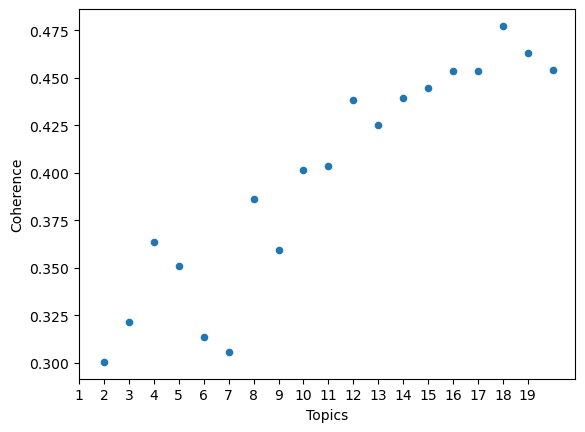

In [40]:
lda_tuning.plot(x ='Topics', y='Coherence', kind = 'scatter', xticks=range(1,20))

<Axes: xlabel='Topics'>

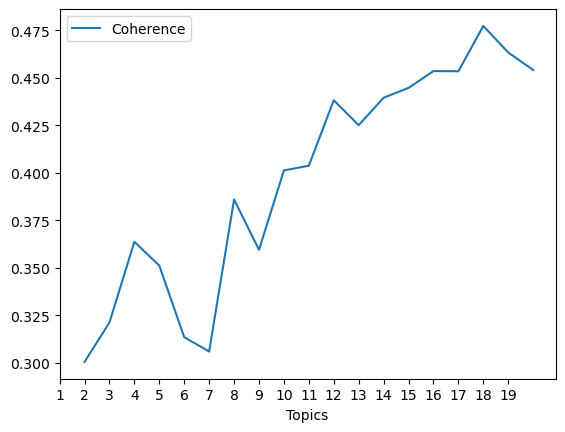

In [41]:
lda_tuning.plot(x ='Topics', y='Coherence', kind = 'line', xticks=range(1,20))

In [42]:
lda_tuning_best = lda_tuning.sort_values(by=['Coherence'], ascending=False).head(1)


tuned_topics = int(lda_tuning_best['Topics'].to_string(index=False))


# Since the values for Alpha and Beta can be float, symmetric and asymmetric, we will either strip or convert to float
try:
    tuned_alpha = float(lda_tuning_best['Alpha'].to_string(index=False))
except:
    tuned_alpha = lda_tuning_best['Alpha'].to_string(index=False).strip()
    

try:
    tuned_beta = float(lda_tuning_best['Beta'].to_string(index=False))
except:
    tuned_beta = lda_tuning_best['Beta'].to_string(index=False).strip()    
    
print(f'Best Parameters: Topics: {tuned_topics}, Alpha: {tuned_alpha}, Beta: {tuned_beta}')

Best Parameters: Topics: 18, Alpha: asymmetric, Beta: auto


In [43]:
# Create the tuned LDA model
tuned_lda_model = LdaMulticore(corpus=doc_term_matrix,
                               id2word=dictionary,
                               num_topics=tuned_topics,
                               random_state=100,
                               passes=10,
                               alpha=tuned_alpha,
                               eta=tuned_beta,
                               workers=workers)

# Compute the coherence score for the tuned model
coherence_model_lda = CoherenceModel(model=tuned_lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.47722762035816035


In [44]:
# Concatenate the cleaned text data of news articles into a single list
cleaned_news_text = news_df['combined_title_text'].tolist()

In [45]:
cleaned_news_text[:1]

['BREAKING BTS Announces LAS VEGAS US Concert Date in 2022 Oakland News Now Oakland News SF Bay Area East Bay California World BREAKING BTS Announces LAS VEGAS US Concert Date in   Oakland News Now  Oakland News SF Bay Area East Bay California WorldSorry you have Javascript Disabled To see this page as it is meant to appear please enable your JavascriptBREAKING BTS Announces LAS VEGAS US Concert Date in   Oakland News Now  Oakland News SF Bay Area East Bay California WorldSkip to contentMenuSearch forSearchOakland News Now  Oakland News SF Bay Area East Bay California WorldOakland News Now Oakland News YouTube Vlog News Aggregator Home  About  Oakland News  Authors  Lake Merritt  SF News  The Alley Cat  Grand Lake Theater   Bartlett Law  Zennie YouTube Channel  Vloggers Page  Comic Con  SDCC  CES  Las Vegas  NFL Draft  NFL Draft Page   The Eagle Offense  City Council  Elections  Privacy  Sponsored Posts   ContactSearch for MenuSearch forSearch BREAKING BTS Announces LAS VEGASBTSBTS Con

In [46]:
!pip install ktrain

Defaulting to user installation because normal site-packages is not writeable


In [47]:
import ktrain
from ktrain import text as txt

In [48]:
tm = txt.get_topic_model(texts=cleaned_news_text,
                           n_topics=tuned_topics,
                           n_features=10000,
                           min_df=5,
                           max_df=0.5,
                           stop_words='english',
                           model_type='lda',
                           lda_max_iter=5,
                           verbose=1)

lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.


In [49]:
tm.print_topics()

topic 0 | awards league sports uefa team game live season school media
topic 1 | shares stock price quarter llc rating management financial holdings daily
topic 2 | times seattle associated world justicelocal politicseducationeducation musictvstreamingcomicsgames replicatodays tvradioentertainmentmoviesbooksmusictheaterclassical press
topic 3 | india share live indian covid twitter read world says opinion
topic 4 | care philips products accessories support product file healthcare pdf automotive
topic 5 | link opens tab people peoplecom account subscription email music join
topic 6 | samsung galaxy pro apple mobile iphone republic smart reviews deals
topic 7 | use windows like need just google users using app make
topic 8 | tech data paid chapter stories forbes program list web metaverse
topic 9 | stocks market stock business data companies financial growth finance nasdaq
topic 10 | game games opens xbox gaming helvetica series tab right like
topic 11 | star reveals says shows black dre

In [50]:
tm.build(cleaned_news_text, threshold=0.25)

done.


In [51]:
# Print the topics by document count
tm.print_topics(show_counts=True)

topic:13 | count:1493 | people ukraine state covid russian court president world city public
topic:7 | count:1322 | use windows like need just google users using app make
topic:9 | count:1020 | stocks market stock business data companies financial growth finance nasdaq
topic:12 | count:903 | market global data business report industry cloud research technology growth
topic:1 | count:881 | shares stock price quarter llc rating management financial holdings daily
topic:10 | count:774 | game games opens xbox gaming helvetica series tab right like
topic:2 | count:662 | times seattle associated world justicelocal politicseducationeducation musictvstreamingcomicsgames replicatodays tvradioentertainmentmoviesbooksmusictheaterclassical press
topic:15 | count:537 | inflation says billion market oil prices rates stocks fed rate
topic:3 | count:377 | india share live indian covid twitter read world says opinion
topic:0 | count:337 | awards league sports uefa team game live season school media
top

**Here,The Top N most important topics in the news articles is 18**

In [52]:
pip install --upgrade scikit-learn threadpoolctl

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.2.0
    Uninstalling threadpoolctl-3.2.0:
      Successfully uninstalled threadpoolctl-3.2.0



**Vizualization - For News Articles**

In [53]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


In [54]:
# Assuming tuned_lda_model, doc_term_matrix, and dictionary are defined correctly
lda_display = gensimvis.prepare(tuned_lda_model, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

In [2]:
import numpy as np
import nltk
from gensim import corpora
from gensim.models import LdaModel
import re
import pyLDAvis.gensim_models

C:\Users\MANOJ\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\MANOJ\AppData\Roaming\Python\Python310\site-packages\pyLDAvis\_prepare.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read Tweets data

In [116]:
tweets_path = 'https://storage.googleapis.com/msca-bdp-data-open/tweets/nlp_a_6_tweets.json'
tweets_df = pd.read_json(tweets_path, orient='records', lines=True)
print(f'Sample contains {tweets_df.shape[0]:,.0f} tweets')
tweets_df.head(2)

Sample contains 9,941 tweets


,id,lang,date,name,retweeted,text
0,1484553027222741001,en,2022-01-21,Dylan Green,RT,*Microsoft has entered the chat* https://t.co/Uz3pZrk6B3
1,1505486305102557184,en,2022-03-20,Rahim Rajwani,,"""I actually use an @Android phone. Some #Android manufacturers pre-install @Microsoft software in a way that makes it easy for me. They’re more flexible about how the software connects up with the OS. So that’s what I ended up getting used to.""\nhttps://t.co/C0VjfS9PUO"


**Filter non-English tweets**

In [117]:
# Filter non-English tweets
tweets_eng = tweets_df[tweets_df['lang']=='en'].reset_index(drop=True)

**Cleaning Tweets Data**

In [118]:
import warnings

In [119]:
warnings.simplefilter("ignore")

In [151]:
%%time
import gensim
import spacy
import re
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

# Load English stop words
stop_words = stopwords.words('english')

def clean_tweets(tweet):
    # Remove special characters and links
    cleaned_tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    cleaned_tweet = re.sub('[^a-zA-Z0-9 @ . , : - _]', '', cleaned_tweet)  # Remove special characters
    return cleaned_tweet

# Apply the cleaning function to the 'text' column
tweets_df['cleanedTweets'] = tweets_df['text'].apply(clean_tweets)




CPU times: total: 46.9 ms
Wall time: 70.8 ms


In [152]:
# Define the function to tokenize text into words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Tokenize the cleaned text
data_tokens = list(sent_to_words(tweets_df['cleanedTweets']))

# Define functions for stopwords, bigrams, trigrams, and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Create bigrams and trigrams
bigram = gensim.models.Phrases(data_tokens, min_count=1, threshold=1)
trigram = gensim.models.Phrases(bigram[data_tokens], threshold=1)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Remove Stop Words
data_tokens_nostops = remove_stopwords(data_tokens)

# Create n-grams
data_words_bigrams = make_bigrams(data_tokens_nostops)
data_words_trigrams = make_trigrams(data_tokens_nostops)

# Combine tokens and n-grams
data_tokens_combined = data_words_trigrams

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Lemmatize text keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_tokens_combined, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Print the lemmatized data for the first document
print(*data_lemmatized[:1])


['enter', 'chat']


In [153]:
from gensim import corpora
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_lemmatized)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_lemmatized]

In [154]:
tweets_df.head(2)

,id,lang,date,name,retweeted,text,cleanedTweets
0,1484553027222741001,en,2022-01-21,Dylan Green,RT,*Microsoft has entered the chat* https://t.co/Uz3pZrk6B3,Microsoft has entered the chat
1,1505486305102557184,en,2022-03-20,Rahim Rajwani,,"""I actually use an @Android phone. Some #Android manufacturers pre-install @Microsoft software in a way that makes it easy for me. They’re more flexible about how the software connects up with the OS. So that’s what I ended up getting used to.""\nhttps://t.co/C0VjfS9PUO",I actually use an @Android phone. Some Android manufacturers preinstall @Microsoft software in a way that makes it easy for me. Theyre more flexible about how the software connects up with the OS. So thats what I ended up getting used to.


**Build initial 3 topic model**

In [155]:
from gensim.models import LdaMulticore

In [156]:
import multiprocessing

# Get the number of available CPU cores
num_processors = multiprocessing.cpu_count()
print("Number of CPU cores:", num_processors)

# Set the number of workers for parallelization
workers = num_processors - 1
print("Workers:", workers)


Number of CPU cores: 8
Workers: 7


In [157]:
lda_model = LdaMulticore(corpus=doc_term_matrix,
                   id2word=dictionary,
                   num_topics=3,
                   random_state=100,
                   passes=10,
                   alpha='symmetric',
                   eta='auto',
                   workers=workers)

In [158]:
import pprint

In [159]:
# Pretty print the topics
pprint.pprint(lda_model.print_topics())

# Get the LDA topic distribution for the documents
doc_lda = lda_model[doc_term_matrix]

[(0,
  '0.005*"get" + 0.004*"number" + 0.004*"work" + 0.004*"call" + '
  '0.004*"product" + 0.004*"support" + 0.004*"go" + 0.003*"make" + '
  '0.003*"business" + 0.003*"number_own"'),
 (1,
  '0.010*"use" + 0.007*"make" + 0.005*"company" + 0.005*"know" + 0.004*"game" '
  '+ 0.004*"go" + 0.004*"time" + 0.004*"come" + 0.004*"window" + 0.003*"want"'),
 (2,
  '0.007*"ever_ever_ever_ever" + 0.006*"game" + 0.006*"get" + 0.004*"good" + '
  '0.004*"know" + 0.003*"window" + 0.003*"year" + 0.003*"day" + 0.003*"want" + '
  '0.003*"work"')]


In [160]:
from gensim.models import CoherenceModel

In [161]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.40952803650147035


**Tune LDA model**

In [162]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = LdaMulticore(corpus=doc_term_matrix,
                       id2word=dictionary,
                       num_topics=k,
                       random_state=100,                  
                       passes=10,
                       alpha=a,
                       eta=b,
                       workers=workers)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

**Hyperparameter Tuning:**

In [163]:
import time

In [164]:
import time
import pandas as pd
import os
import pandas as pd
import os

grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 20
step_size = 1
topics_range = range(min_topics, max_topics+1, step_size)

# Alpha parameter
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')
alpha = ['asymmetric'] # Run for number of topics only

# Beta parameter
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')
beta = ['auto'] # Run for number of topics only


# Validation sets
num_of_docs = len(doc_term_matrix)
corpus_sets = [# gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.5), 
#                gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.75), 
               doc_term_matrix]
# corpus_title = ['75% Corpus', '100% Corpus']
corpus_title = ['100% Corpus']
model_results = {
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

itr = 0
itr_total = len(beta)*len(alpha)*len(topics_range)*len(corpus_title)
print(f'LDA will execute {itr_total} iterations')

    
# iterate through hyperparameters
for i in range(len(corpus_sets)):
    for k in topics_range:
        # iterate through alpha values
        for a in alpha:
            # iterare through beta values
            for b in beta:
                # get the coherence score for the given parameters
                itr += 1
                cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                              k=k, a=a, b=b)
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                pct_completed = round((itr / itr_total * 100), 1)
                print(f'Completed model based on {k} LDA topics. Finished {pct_completed}% of LDA runs')
                    
lda_tuning = pd.DataFrame(model_results)
lda_tuning.to_csv(os.path.join(path_lda, 'lda_tuning_results.csv'), index=False)

LDA will execute 19 iterations
Completed model based on 2 LDA topics. Finished 5.3% of LDA runs
Completed model based on 3 LDA topics. Finished 10.5% of LDA runs
Completed model based on 4 LDA topics. Finished 15.8% of LDA runs
Completed model based on 5 LDA topics. Finished 21.1% of LDA runs
Completed model based on 6 LDA topics. Finished 26.3% of LDA runs
Completed model based on 7 LDA topics. Finished 31.6% of LDA runs
Completed model based on 8 LDA topics. Finished 36.8% of LDA runs
Completed model based on 9 LDA topics. Finished 42.1% of LDA runs
Completed model based on 10 LDA topics. Finished 47.4% of LDA runs
Completed model based on 11 LDA topics. Finished 52.6% of LDA runs
Completed model based on 12 LDA topics. Finished 57.9% of LDA runs
Completed model based on 13 LDA topics. Finished 63.2% of LDA runs
Completed model based on 14 LDA topics. Finished 68.4% of LDA runs
Completed model based on 15 LDA topics. Finished 73.7% of LDA runs
Completed model based on 16 LDA topics. 

In [165]:
lda_tuning = pd.read_csv(os.path.join(path_lda, 'lda_tuning_results.csv'))

**N most Important Topics**

In [166]:
# Best LDA parameters
lda_tuning.sort_values(by=['Coherence'], ascending=False).head(10)

,Topics,Alpha,Beta,Coherence
0,2,asymmetric,auto,0.472255
1,3,asymmetric,auto,0.375306
2,4,asymmetric,auto,0.356322
6,8,asymmetric,auto,0.348036
4,6,asymmetric,auto,0.338671
3,5,asymmetric,auto,0.336100
5,7,asymmetric,auto,0.332617
10,12,asymmetric,auto,0.322268
18,20,asymmetric,auto,0.320959
15,17,asymmetric,auto,0.320671


In [167]:
# Worst LDA parameters
lda_tuning.sort_values(by=['Coherence']).head(10)

,Topics,Alpha,Beta,Coherence
11,13,asymmetric,auto,0.284449
7,9,asymmetric,auto,0.293616
8,10,asymmetric,auto,0.294060
12,14,asymmetric,auto,0.302777
9,11,asymmetric,auto,0.305065
16,18,asymmetric,auto,0.305871
14,16,asymmetric,auto,0.308167
17,19,asymmetric,auto,0.308919
13,15,asymmetric,auto,0.317036
15,17,asymmetric,auto,0.320671


<Axes: xlabel='Topics', ylabel='Coherence'>

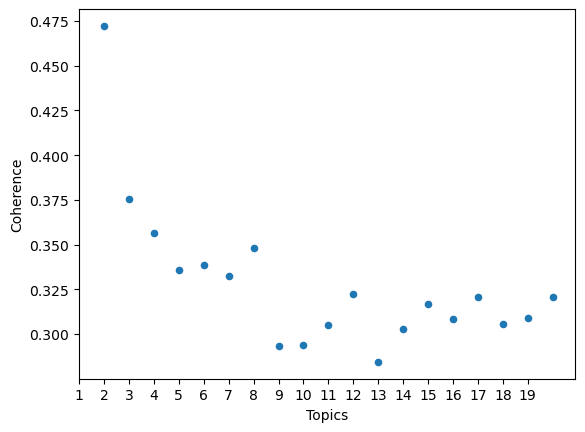

In [168]:
lda_tuning.plot(x ='Topics', y='Coherence', kind = 'scatter', xticks=range(1,20))

<Axes: xlabel='Topics'>

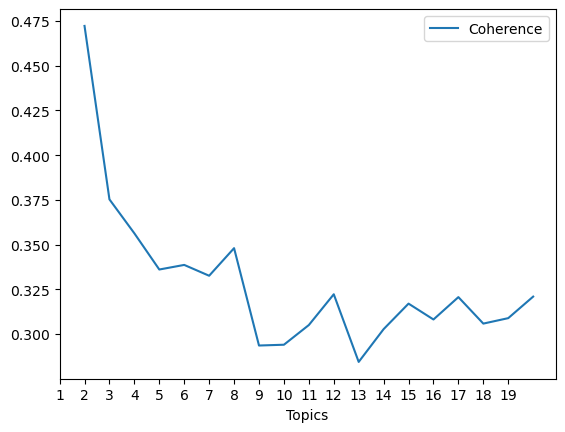

In [169]:
lda_tuning.plot(x ='Topics', y='Coherence', kind = 'line', xticks=range(1,20))

In [170]:
tweets_df.head(2)

,id,lang,date,name,retweeted,text,cleanedTweets
0,1484553027222741001,en,2022-01-21,Dylan Green,RT,*Microsoft has entered the chat* https://t.co/Uz3pZrk6B3,Microsoft has entered the chat
1,1505486305102557184,en,2022-03-20,Rahim Rajwani,,"""I actually use an @Android phone. Some #Android manufacturers pre-install @Microsoft software in a way that makes it easy for me. They’re more flexible about how the software connects up with the OS. So that’s what I ended up getting used to.""\nhttps://t.co/C0VjfS9PUO",I actually use an @Android phone. Some Android manufacturers preinstall @Microsoft software in a way that makes it easy for me. Theyre more flexible about how the software connects up with the OS. So thats what I ended up getting used to.


In [171]:
lda_tuning_best = lda_tuning.sort_values(by=['Coherence'], ascending=False).head(1)


tuned_topics = int(lda_tuning_best['Topics'].to_string(index=False))


# Since the values for Alpha and Beta can be float, symmetric and asymmetric, we will either strip or convert to float
try:
    tuned_alpha = float(lda_tuning_best['Alpha'].to_string(index=False))
except:
    tuned_alpha = lda_tuning_best['Alpha'].to_string(index=False).strip()
    

try:
    tuned_beta = float(lda_tuning_best['Beta'].to_string(index=False))
except:
    tuned_beta = lda_tuning_best['Beta'].to_string(index=False).strip()    
    
print(f'Best Parameters: Topics: {tuned_topics}, Alpha: {tuned_alpha}, Beta: {tuned_beta}')

Best Parameters: Topics: 2, Alpha: asymmetric, Beta: auto


In [172]:
# Create the tuned LDA model
tuned_lda_model = LdaMulticore(corpus=doc_term_matrix,
                               id2word=dictionary,
                               num_topics=tuned_topics,
                               random_state=100,
                               passes=10,
                               alpha=tuned_alpha,
                               eta=tuned_beta,
                               workers=workers)

# Compute the coherence score for the tuned model
coherence_model_lda = CoherenceModel(model=tuned_lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.47225507960222246


In [186]:
tweets_tolist = tweets_df['cleanedTweets'].tolist()
tweets_tolist[:1]

['Microsoft has entered the chat ']

In [197]:
tweets_tolist_str = [str(tweet) for tweet in tweets_tolist]

In [198]:
import ktrain
from ktrain import text

In [202]:
from gensim.corpora import Dictionary
texts = [[word for word in simple_preprocess(tweet) if word not in stop_words] for tweet in tweets_tolist_str]

# Create a dictionary representation of the documents
dictionary = Dictionary(texts)

# Filter out tokens that appear in less than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics():
    print(f'Topic {idx}: {topic}')

Topic 0: 0.019*"ever" + 0.010*"windows" + 0.009*"excel" + 0.008*"know" + 0.008*"use" + 0.007*"dont" + 0.007*"like" + 0.006*"word" + 0.006*"people" + 0.006*"amp"
Topic 1: 0.013*"xbox" + 0.010*"activision" + 0.008*"azure" + 0.008*"new" + 0.006*"blizzard" + 0.006*"cloud" + 0.006*"amp" + 0.005*"game" + 0.005*"billion" + 0.005*"gaming"


In [204]:
texts = [[word for word in simple_preprocess(tweet) if word not in stop_words] for tweet in tweets_tolist_str]

# Create a dictionary representation of the documents
dictionary = Dictionary(texts)

# Filter out tokens that appear in less than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, passes=10)

# Print the top topics without scores
for idx, topic in lda_model.print_topics():
    topic_text = ' '.join(re.findall(r'"([^"]*)"', topic))
    print(f'Topic {idx}: {topic_text}')


Topic 0: apple google azure amp new data amazon tech cloud premium
Topic 1: ever xbox like know activision windows dont excel game games


**Here, The N important topic obtained is 2**

**Based on the News Article Analysis , Vizualization for tweets can also be performed**